In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [44]:
data = pd.read_excel('ex2data1.xls')
train_data = data.sample(frac = 0.9)
test_data = data.drop(train_data.index)

x1 = np.array(train_data['x1'])
x2 = np.array(train_data['x2'])
y = np.array(train_data['y'])
m = len(x1)
x1_mu = np.mean(x1)
x1_st = np.std(x1)
x2_mu = np.mean(x2)
x2_st = np.std(x2)

x1 = (x1-x1_mu)/x1_st
x2 = (x2-x2_mu)/x2_st
x = np.array([np.ones(m), x1, x2])
x = x.transpose()

In [46]:
def activation(x, theta):
    return np.float(1/(1+np.exp(-np.matmul(x, theta))))

def j_loss(theta):
    loss = 0
    for mi in range(m):
        loss += (np.float(y[mi]) - activation(x[mi], theta))**2
    return loss/m

def delop(theta_init, dx):
    theta = np.copy(theta_init)
    ans = np.zeros(theta_init.shape)
    for i in range(len(theta)):
        theta[i] += dx
        ans[i] = (j_loss(theta)-j_loss(theta_init))/dx
        theta[i] -= dx
    return ans

In [47]:
theta = np.array([[0.1], [0.1], [0.1]])
alpha = 0.1
itr = 10000
for i in range(itr):
    theta_next = theta - alpha*delop(theta, 10**-6)
    if sum((theta-theta_next)**2) < 10**-8:
        print('{} Iterations Taken..!'.format(i))
        break
    theta = np.copy(theta_next)
print(theta)

6946 Iterations Taken..!
[[1.35191937]
 [3.19456623]
 [2.72261871]]


In [48]:
x1_test = np.array(test_data['x1'])
x2_test = np.array(test_data['x2'])
y_test = np.array(test_data['y'])
m_test = len(x1_test)

x1_test = (x1_test-x1_mu)/x1_st
x2_test = (x2_test-x2_mu)/x2_st
x_test = np.array([np.ones(m_test), x1_test, x2_test])
x_test = x_test.transpose()

In [49]:
correct = 0
for i in range(m):
    if activation(x[i], theta) > 0.5:
        print('predicted class 1 and is actually', y[i])
        if y[i] == 1: correct += 1
    else:
        print('predicted class 0 and is actually', y[i])
        if y[i] == 0: correct += 1
print('Accuracy: ', correct/m)

predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 0 and is actually 0
predicted class 1 and is actually 0
predicted class 1 and is actually 1
predicted class 0 and is actually 0
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 1 and is actually 0
predicted class 0 and is actually 0
predicted class 0 and is actually 0
predicted class 1 and is actually 1
predicted class 0 and is actually 1
predicted class 0 and is actually 0
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 0 and is actually 0
predicted class 1 and is actually 1
predicted class 0 and is actually 0
predicted class 1 and is actually 0
predicted class 1 and is actually 1
predicted class 1 and is actually 1
predicted class 0 and is act

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

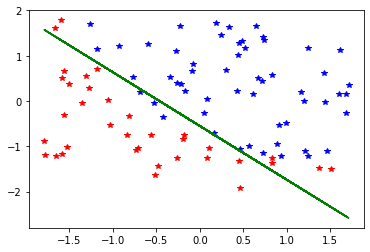

In [28]:
class1 = train_data[train_data.y == 0]
class2 = train_data[train_data.y == 1]

class1['x1'] = (class1['x1']-x1_mu)/x1_st
class1['x2'] = (class1['x2']-x2_mu)/x2_st

class2['x1'] = (class2['x1']-x1_mu)/x1_st
class2['x2'] = (class2['x2']-x2_mu)/x2_st

plt.plot(class1['x1'], class1['x2'], 'r*')
plt.plot(class2['x1'], class2['x2'], 'b*')

t0 = np.float(theta[0])
t1 = np.float(theta[1])
t2 = np.float(theta[2])
plt.plot(x1, (-t0-t1*x1)/t2, 'g')

plt.show()

In [19]:
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
#########################################################################################
#########################################################################################
#########################################################################################
#########################################################################################

In [29]:
data = pd.read_excel('ex2data2.xls')
train_data = data.sample(frac = 0.9)
test_data = data.drop(train_data.index)

x1 = np.array(train_data['x1'])
x2 = np.array(train_data['x2'])
y = np.array(train_data['y'])
m = len(x1)
x1_mu = np.mean(x1)
x1_st = np.std(x1)
x2_mu = np.mean(x2)
x2_st = np.std(x2)

x1 = (x1-x1_mu)/x1_st
x2 = (x2-x2_mu)/x2_st
x = np.array([np.ones(m), x1, x2, x1**2, x2**2, x1*x2])
x = x.transpose()

In [30]:
theta = np.array([[0.1], [0.1], [0.1], [0.1], [0.1], [0.1]])
alpha = 0.1
itr = 10000
for i in range(itr):
    theta_next = theta - alpha*delop(theta, 10**-6)
    if sum((theta-theta_next)**2) < 10**-8:
        print('{} Iterations Taken..!'.format(i))
        break
    theta = np.copy(theta_next)
print(theta)

[[ 4.8109338 ]
 [ 0.24681606]
 [-0.2233313 ]
 [-2.55222838]
 [-2.85196897]
 [-1.92361918]]


In [31]:
x1_test = np.array(test_data['x1'])
x2_test = np.array(test_data['x2'])
y_test = np.array(test_data['y'])
m_test = len(x1_test)

x1_test = (x1_test-x1_mu)/x1_st
x2_test = (x2_test-x2_mu)/x2_st
x_test = np.array([np.ones(m_test), x1_test, x2_test, x1_test**2, x2_test**2, x1_test*x2_test])
x_test = x_test.transpose()

In [32]:
correct = 0
for i in range(m_test):
    if activation(x_test[i], theta) > 0.5:
        print('predicted class 1 and is actually', y[i])
        if y[i] == 1: correct += 1
    else:
        print('predicted class 0 and is actually', y[i])
        if y[i] == 0: correct += 1
print('Accuracy: ', correct/m_test)

predicted class 1 and is actually 1
predicted class 0 and is actually 1
predicted class 0 and is actually 0
predicted class 1 and is actually 0
predicted class 1 and is actually 0
predicted class 1 and is actually 0
predicted class 0 and is actually 0
predicted class 1 and is actually 1
predicted class 0 and is actually 0
predicted class 0 and is actually 1
predicted class 0 and is actually 0
predicted class 0 and is actually 0
Accuracy:  0.5833333333333334


c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

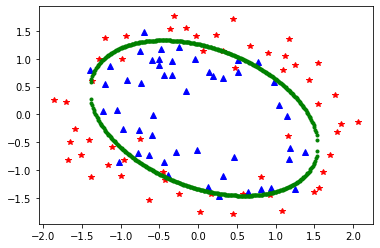

In [43]:
class1 = train_data[train_data.y == 0]
class2 = train_data[train_data.y == 1]

class1['x1'] = (class1['x1']-x1_mu)/x1_st
class1['x2'] = (class1['x2']-x2_mu)/x2_st

class2['x1'] = (class2['x1']-x1_mu)/x1_st
class2['x2'] = (class2['x2']-x2_mu)/x2_st

plt.plot(class1['x1'], class1['x2'], 'r*')
plt.plot(class2['x1'], class2['x2'], 'b^')

t0 = np.float(theta[0])
t1 = np.float(theta[1])
t2 = np.float(theta[2])
t3 = np.float(theta[3])
t4 = np.float(theta[4])
t5 = np.float(theta[5])

bound = np.array(np.arange(-2, 2, 0.01))

plt.plot(bound, (-t2-t5*bound+np.sqrt((t2+t5*bound)**2 - 4*t4*(t3*bound**2+t1*bound+t0)))/(2*t4), 'g.')
plt.plot(bound, (-t2-t5*bound-np.sqrt((t2+t5*bound)**2 - 4*t4*(t3*bound**2+t1*bound+t0)))/(2*t4), 'g.')

plt.show()